<a href="https://colab.research.google.com/github/sarthak221995/100DaysOfMLCode/blob/master/HoltWintersPredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
df=pd.read_csv("airline_passengers.csv",index_col="Month",parse_dates=True)

In [0]:
#Month Start
df.index.freq='MS'

In [18]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [0]:
#train-test split
train_data=df.iloc[:109]
test_data=df.iloc[108:]

In [0]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [0]:
fitted_model=ExponentialSmoothing(train_data['Thousands of Passengers'],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

In [0]:
test_predictions=fitted_model.forecast(36)

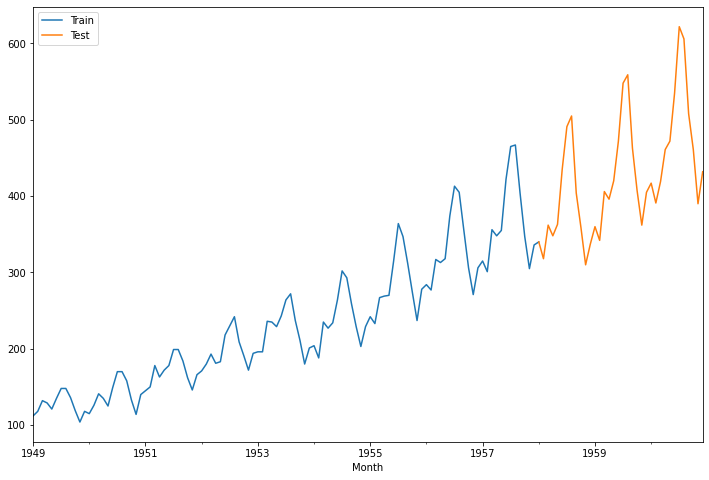

In [24]:
train_data['Thousands of Passengers'].plot(legend = True,label="Train",figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend = True,label="Test",figsize=(12,8))

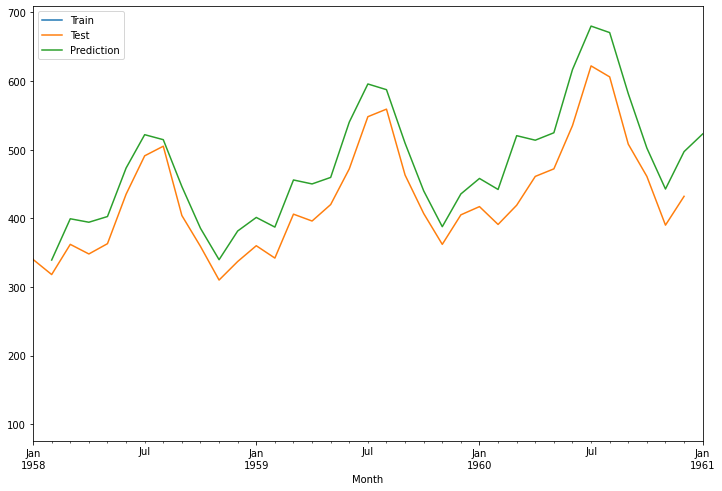

In [26]:
train_data['Thousands of Passengers'].plot(legend = True,label="Train",figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend = True,label="Test",figsize=(12,8))
test_predictions.plot(legend=True, label="Prediction",xlim=['1958-01-01','1961-01-01'])

# Evaluation

In [0]:
#Mean Absolute Error(MAE)
#Mean Square Error (MSE)
#Root Mean Square Error (RMSE) - Prefered

In [0]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
mean_absolute_error(test_data,test_predictions)

63.03138491847624

In [31]:
mean_squared_error(test_data,test_predictions)

5614.4207149269

In [35]:
np.sqrt(mean_squared_error(test_data,test_predictions))

74.92943823976594

In [0]:
final_model=ExponentialSmoothing(df['Thousands of Passengers'],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

In [0]:
forecast_preductions=final_model.forecast(36)

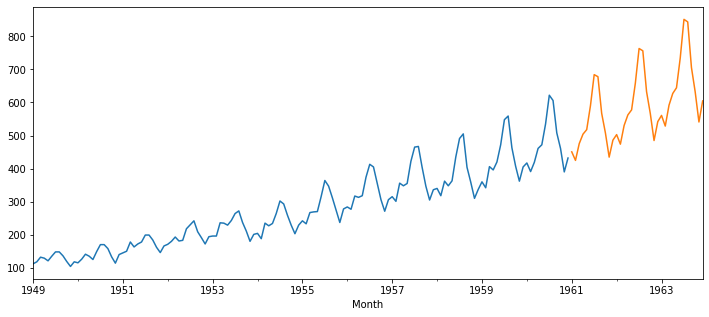

In [38]:
df['Thousands of Passengers'].plot(figsize=(12,5))
forecast_preductions.plot()